In [280]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [281]:
spacing = "15.5GHz"
df = pd.read_csv(f"BER_DBSCAN/nuevo/BER_{spacing}_new.csv")
df.head()

,epsilon,min_samples,OSNR,BER
0,0.2,10.0,20.0,0.500361
1,0.2,10.0,21.5,0.500326
2,0.2,10.0,23.0,0.498948
3,0.2,10.0,25.0,0.499035
4,0.2,10.0,27.0,0.499008


In [282]:
best_df = df.loc[df.groupby('OSNR')['BER'].idxmin()]
best_df.loc[best_df['BER'] == 0, 'BER'] = 1e-10
best_df

,epsilon,min_samples,OSNR,BER
81,0.15,160.0,20.0,0.338615
82,0.15,160.0,21.5,0.418102
83,0.15,160.0,23.0,0.317780
84,0.15,160.0,25.0,0.318489
121,0.10,80.0,27.0,0.406960
86,0.15,160.0,30.0,0.256719
132,0.10,160.0,32.0,0.343679
88,0.15,160.0,35.0,0.285142
89,0.15,160.0,40.0,0.255346


In [283]:
osnr = {
    "Single_Ch": [14.3, 15.3, 16.3, 17.8, 19.3, 21.3, 23.3, 26.3, 28.3],
    "18GHz": [18, 19, 20, 23, 25, 27, 30, 32, 35, 40],
    "17.6GHz": [18, 19, 20, 21.5, 23, 25, 27, 30, 32, 35, 40],
    "17GHz": [18, 19, 20, 21.5, 23, 25, 27, 30, 32, 35, 40],
    "16.5GHz": [18, 19, 20, 21.5, 23, 25, 27, 30, 32, 35, 40],
    "16GHz": [18, 19, 20, 21.5, 23, 25, 27, 30, 32, 35, 40],
    "15.5GHz": [20, 21.5, 23, 25, 27, 30, 32, 35, 40]
}

In [284]:
conv = np.loadtxt(f"BER_DB/Conventional/Conventional_{spacing}.txt")

knn = np.array([np.loadtxt(f"BER_DB/KNN/KNN_{spacing}/KNN_{spacing}_{i}dB.txt") for i in osnr[spacing]])
knn = np.array([np.min(knn[i, :]) for i in range(len(knn))])

svm = np.loadtxt(f"BER_DB/SVM/SVM_{spacing}.txt")
svm = np.array([svm[i] for i in range(len(svm)) if svm[i] != 0])

rdf = np.loadtxt(f"BER_DB/RDF/RDF_{spacing}.txt")

dt = np.array([np.loadtxt(f"BER_DB/DTL/DTL_{spacing}/DTL_{spacing}_{i}dB.txt") for i in osnr[spacing]])
dt = np.array([np.min(dt[i, :]) for i in range(len(dt))])

kmeans = np.loadtxt(f"BER_DB/KMeans/KMeans_{spacing}.txt")

In [285]:
for i in range(len(best_df)):
    if best_df.iloc[i]['BER'] > conv[i]:
        best_df.iloc[i]['BER'] = conv[i]

In [286]:
def polinomial_func(x_step, x, y, deg=2):
    p = np.polyfit(x, y, deg)
    z = np.poly1d(p)
    curve = z(x_step)
    return curve

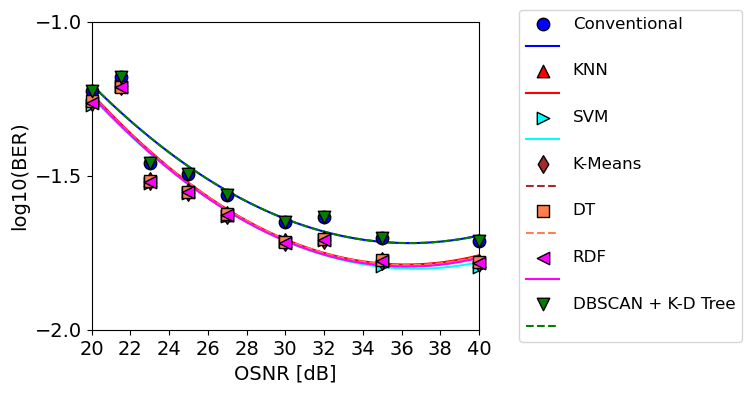

In [299]:
x_step = np.linspace(np.min(osnr[spacing]), np.max(osnr[spacing]), 1000)

plt.figure(figsize=(5, 4))
# Graficar log10(BER) vs OSNR de conv
plt.scatter(osnr[spacing][0:len(svm)], np.log10(conv[0:len(svm)]), label='Conventional', 
            color='blue', edgecolors='black', marker='o', s=80, zorder=3, clip_on=False)
plt.plot(x_step, polinomial_func(x_step, osnr[spacing][0:len(svm)], np.log10(conv[0:len(svm)])),
         color='blue', label=' ')
# Graficar log10(BER) vs OSNR de knn
plt.scatter(osnr[spacing][0:len(svm)], np.log10(knn[0:len(svm)]), label='KNN', 
            color='red', edgecolors='black', marker='^', s=80, zorder=3, clip_on=False)
plt.plot(x_step, polinomial_func(x_step, osnr[spacing][0:len(svm)], np.log10(knn[0:len(svm)])), 
         color='red', label=' ')
# Graficar log10(BER) vs OSNR de svm
plt.scatter(osnr[spacing][0:len(svm)], np.log10(svm), label='SVM', 
            color='cyan', edgecolors='black', marker='>', s=80, zorder=3, clip_on=False)
plt.plot(x_step, polinomial_func(x_step, osnr[spacing][0:len(svm)], np.log10(svm)), 
         color='cyan', label=' ')
# Graficar log10(BER) vs OSNR de kmeans
plt.scatter(osnr[spacing][0:len(svm)], np.log10(kmeans[0:len(svm)]), label='K-Means', 
            color='brown', edgecolors='black', marker='d', s=80, zorder=3, clip_on=False)
plt.plot(x_step, polinomial_func(x_step, osnr[spacing][0:len(svm)], np.log10(kmeans[0:len(svm)])),
            color='brown', linestyle='--', label=' ')
# Graficar log10(BER) vs OSNR de dt
plt.scatter(osnr[spacing][0:len(svm)], np.log10(dt[0:len(svm)]), label='DT', 
            color='coral', edgecolors='black', marker='s', s=80, zorder=3, clip_on=False)
plt.plot(x_step, polinomial_func(x_step, osnr[spacing][0:len(svm)], np.log10(dt[0:len(svm)])),
            color='coral', linestyle='--', label=' ')
# Graficar log10(BER) vs OSNR de rdf
plt.scatter(osnr[spacing][0:len(svm)], np.log10(rdf[0:len(svm)]), label='RDF', 
            color='magenta', edgecolors='black', marker='<', s=80, zorder=3, clip_on=False)
plt.plot(x_step, polinomial_func(x_step, osnr[spacing][0:len(svm)], np.log10(rdf[0:len(svm)])), 
         color='magenta', label=' ')
# Graficar log10(BER) vs OSNR de best_df
plt.scatter(osnr[spacing][0:len(svm)], np.log10(best_df['BER'][0:len(svm)]), label='DBSCAN + K-D Tree', 
            color='green', edgecolors='black', marker='v', s=80, zorder=3, clip_on=False)
plt.plot(x_step, polinomial_func(x_step, osnr[spacing][0:len(svm)], np.log10(best_df['BER'][0:len(svm)])), 
         color='green', linestyle='--', label=' ')

plt.xlabel('OSNR [dB]', fontsize=14)
plt.ylabel('log10(BER)', fontsize=14)
plt.xticks(np.arange(np.min(osnr[spacing]), np.max(osnr[spacing])+1, 2), fontsize=14)
plt.yticks(fontsize=14)
plt.xlim([np.min(osnr[spacing]), np.max(osnr[spacing])])
plt.ylim([-2, -1])
plt.yticks(np.arange(-2, -0.9, 0.5))

# ax_zoom = plt.axes([0.56, 0.55, 0.3, 0.3])
# # Graficar log10(BER) vs OSNR de conv
# ax_zoom.plot(x_step, polinomial_func(x_step, osnr[spacing][0:len(svm)], np.log10(conv[0:len(svm)])),
#             color='blue', label='Conventional')
# # Graficar log10(BER) vs OSNR de knn
# ax_zoom.plot(x_step, polinomial_func(x_step, osnr[spacing][0:len(svm)], np.log10(knn[0:len(svm)])), 
#          color='red', label='KNN')
# # Graficar log10(BER) vs OSNR de svm
# ax_zoom.plot(x_step, polinomial_func(x_step, osnr[spacing][0:len(svm)], np.log10(svm)), 
#          color='cyan', label='SVM')
# # Graficar log10(BER) vs OSNR de kmeans
# ax_zoom.plot(x_step, polinomial_func(x_step, osnr[spacing][0:len(svm)], np.log10(kmeans[0:len(svm)])),
#             color='brown', linestyle='--', label='KMeans')
# # Graficar log10(BER) vs OSNR de dt
# ax_zoom.plot(x_step, polinomial_func(x_step, osnr[spacing][0:len(svm)], np.log10(dt[0:len(svm)])),
#             color='coral', linestyle='--', label='DT')
# # Graficar log10(BER) vs OSNR de rdf
# ax_zoom.plot(x_step, polinomial_func(x_step, osnr[spacing][0:len(svm)], np.log10(rdf[0:len(svm)])), 
#          color='magenta', label='RDF')
# # Graficar log10(BER) vs OSNR de best_df
# ax_zoom.plot(x_step, polinomial_func(x_step, osnr[spacing][0:len(svm)], np.log10(best_df['BER'][0:len(svm)])), 
#          color='green', linestyle='--', label='DBSCAN + KDTree')
# ax_zoom.hlines(-2.4, np.min(osnr[spacing]), np.max(osnr[spacing]), color='black', linestyle='--', label='Threshold')
# # ax_zoom.text(22.8, -2.43, 'FEC limit', fontsize=12)

# ax_zoom.set_xlim([np.min(osnr[spacing]), np.max(osnr[spacing])])
# ax_zoom.set_ylim([-2.5, -2.3])
# ax_zoom.set_xlim([30,33])
# # ax_zoom.set_xticks(np.arange(23, 26, 0.5))
# ax_zoom.set_yticks(np.arange(-2.5, -2.25, 0.05))

plt.legend(loc='center right', fontsize=12, bbox_to_anchor=(1.7, 0.5))
# plt.savefig(f"fig_{spacing}.svg", bbox_inches='tight', format='svg', pad_inches=0.1)
plt.savefig("legend.svg", bbox_inches='tight', format='svg', pad_inches=0.1)
plt.show()